# Graded index fiber using the radial solver

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pyMMF.functions import colorize
import pyMMF

## 1. Fiber parameters

In [2]:
NA = 0.2
radius = 25 # in microns
areaSize = 2.4*radius # calculate the field on an area larger than the diameter of the fiber
n_points_modes = 256 # resolution of the window
n1 = 1.45 # index of refraction at r=0 (maximum)
wl = 1.55 # wavelength in microns
curvature = None
k0 = 2.*np.pi/wl

r_max = 3.2*radius
npoints_search = 2**8
dh = 2*radius/npoints_search

# solver parameters
change_bc_radius_step = 0.95
N_beta_coarse = 1000
degenerate_mode = 'exp'
min_radius_bc = 1.5

## 2. Compute the mode with radial solver

In [3]:
profile = pyMMF.IndexProfile(
    npoints = n_points_modes, 
    areaSize = areaSize
)
profile.initParabolicGRIN(n1=n1, a=radius, NA=NA)

solver = pyMMF.propagationModeSolver()
solver.setIndexProfile(profile)
solver.setWL(wl)
modes = solver.solve(mode='radial',
                    curvature = curvature,
                    r_max = r_max, # max radius to calculate (and first try for large radial boundary condition)
                    dh = dh, # radial resolution during the computation
                    min_radius_bc = min_radius_bc, # min large radial boundary condition
                    change_bc_radius_step = change_bc_radius_step, #change of the large radial boundary condition if fails 
                    N_beta_coarse = N_beta_coarse, # number of steps of the initial coarse scan
                    degenerate_mode = degenerate_mode
                    )

2024-07-09 19:29:47,591 - pyMMF.core [DEBUG  ]  Debug mode ON.
2024-07-09 19:29:47,601 - pyMMF.solv [INFO   ]  Found 5 radial mode(s) for m=0
2024-07-09 19:29:47,602 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2024-07-09 19:29:47,603 - pyMMF.solv [ERROR  ]  Field limit 1.0 at the founded beta=0.05066217542815342 is greater than field_limit_tol=0.001
2024-07-09 19:29:47,603 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2024-07-09 19:29:47,603 - pyMMF.solv [WARNING]  Retrying by changing r_max to 3.04a
2024-07-09 19:29:47,604 - pyMMF.solv [ERROR  ]  Field limit 1.0 at the founded beta=0.05066217542815342 is greater than field_limit_tol=0.001
2024-07-09 19:29:47,605 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2024-07-09 19:29:47,605 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.89a
2024-07-09 19:29:47,606 - pyMMF.solv [ERROR  ]  Field limit 1.0 at the founded beta=0.05066217542815342 is greater than field_limit_tol=0.001
202

## 3. Results

### Dispersion

In [4]:
# sort modes by decreasing propagation constant
modes.sort()

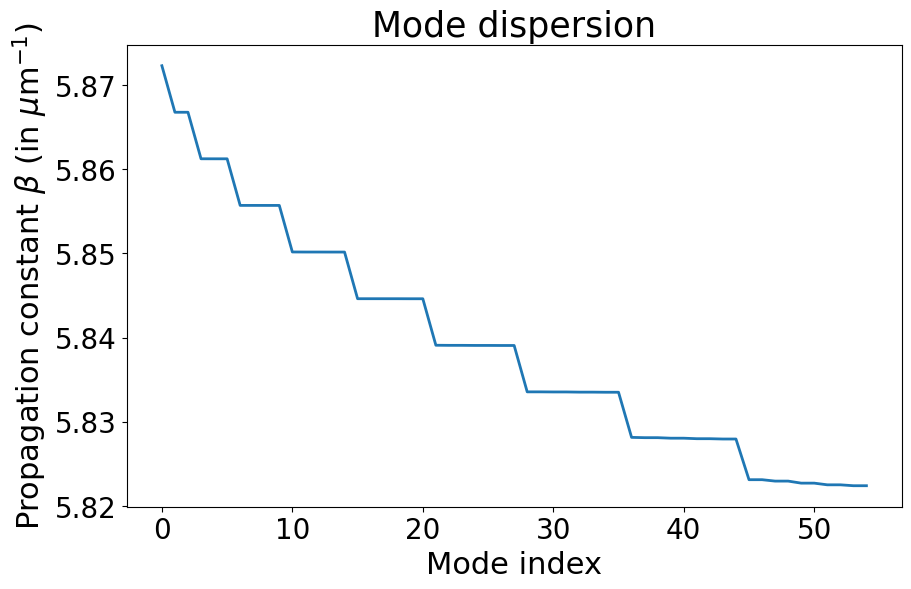

In [5]:
plt.figure(figsize=(10,6)); 
plt.plot((np.real(modes.betas)),
         linewidth=2.)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'Mode dispersion' ,fontsize = 25)
plt.ylabel(r'Propagation constant $\beta$ (in $\mu$m$^{-1}$)', fontsize = 22)
plt.xlabel(r'Mode index', fontsize = 22)
plt.show()

### Display some modes

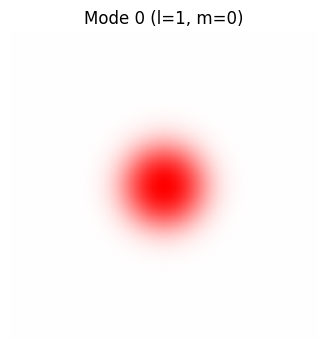

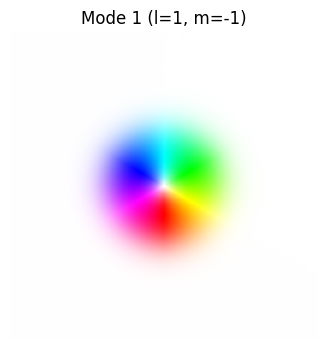

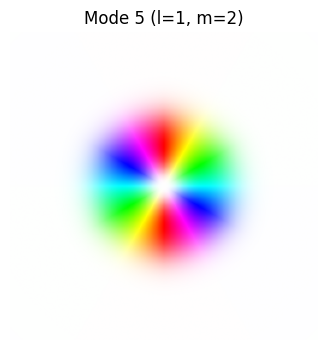

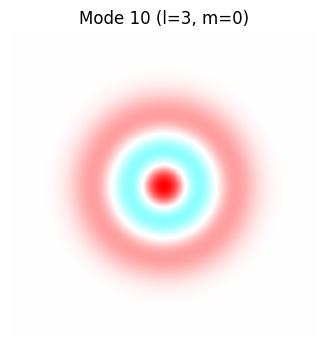

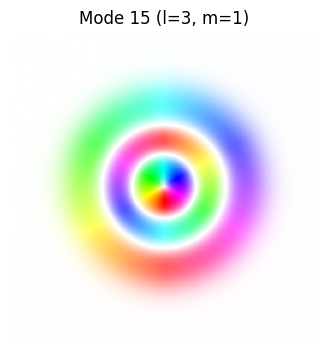

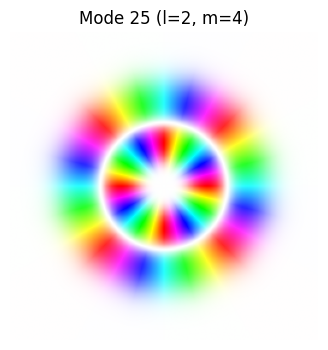

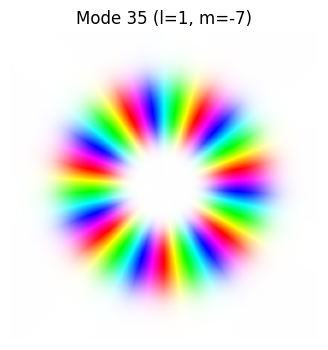

In [6]:
i_modes = [0,1,5,10,15,25,35]

M0 = modes.getModeMatrix()

for i in i_modes:
    Mi = M0[...,i]
    mode_profile = Mi.reshape([n_points_modes]*2)
    plt.figure(figsize = (4,4))
    plt.imshow(colorize(mode_profile,'white'))
    plt.axis('off')
    plt.title(f'Mode {i} (l={modes.l[i]}, m={modes.m[i]})')

## 4. Save the data

In [8]:
filename = 'GRIN_profile.pkl'
profile.save(filename)

profile2 = pyMMF.IndexProfile.fromFile(filename)

In [ ]:
params = {}
params['NA'] = NA
params['radius'] = radius # in microns
params['areaSize'] = areaSize # calculate the field on an area larger than the diameter of the fiber
params['n_points_modes'] = n_points_modes # resolution of the window
params['n1'] = n1 # index of refraction at r=0 (maximum)
params['wl'] = wl # wavelength in microns
params['curvature'] = curvature
params['k0'] = k0

params['r_max'] = r_max
params['npoints_search'] = npoints_search
params['dh'] = dh

params['min_radius_bc'] = min_radius_bc
params['change_bc_radius_step'] = change_bc_radius_step
params['N_beta_coarse'] = N_beta_coarse
params['degenerate_mode'] = degenerate_mode
params['mode'] = 'radial'

np.savez('GRIN_test_radial', M0 = M0, params = params, betas = modes.betas)